In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Load the inference pickle file
with open('/storage/vbutoi/scratch/ESE/records/inference_stats.pkl', 'rb') as f:
    all_logs = pickle.load(f)

In [3]:
all_logs

,subj_idx,slice,label_predicted,label_amount,metric,metric_weighting,metric_score,metric_bins,bin_counts,accuracy,weighted_accuracy,dice,task,split
0,0,0,0.0,0.0,ECE,uniform,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,1.0,Singapore,train
1,0,0,0.0,0.0,ECE,weighted,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,1.0,Singapore,train
2,0,0,0.0,0.0,ESE,uniform,4.350782e-08,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,1.0,Singapore,train
3,0,0,0.0,0.0,ESE,weighted,4.350782e-07,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,1.0,Singapore,train
4,0,0,0.0,0.0,ReCE,uniform,4.350782e-08,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,1.0,Singapore,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165883,6,255,0.0,0.0,ECE,weighted,0.000000e+00,"(0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0)",1.0,1.0,1.0,Amsterdam,cal
165884,6,255,0.0,0.0,ESE,uniform,4.350782e-08,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,1.0,Amsterdam,cal
165885,6,255,0.0,0.0,ESE,weighted,4.350782e-07,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1.0,1.0,1.0,Amsterdam,cal
165886,6,255,0.0,0.0,ReCE,uniform,4.350782e-08,"(4.3507816e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,1.0,1.0,Amsterdam,cal


In [4]:
all_logs.keys()

Index(['subj_idx', 'slice', 'label_predicted', 'label_amount', 'metric',
       'metric_weighting', 'metric_score', 'metric_bins', 'bin_counts',
       'accuracy', 'weighted_accuracy', 'dice', 'task', 'split'],
      dtype='object')

In [5]:
example = all_logs.iloc[0]
for field in example.keys():
    print(field, type(example[field]), ":", example[field])

subj_idx <class 'numpy.int64'> : 0
slice <class 'numpy.int64'> : 0
label_predicted <class 'numpy.float64'> : 0.0
label_amount <class 'numpy.float64'> : 0.0
metric <class 'str'> : ECE
metric_weighting <class 'str'> : uniform
metric_score <class 'numpy.float64'> : 0.0
metric_bins <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
bin_counts <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
accuracy <class 'numpy.float64'> : 1.0
weighted_accuracy <class 'numpy.float64'> : 1.0
dice <class 'numpy.float64'> : 1.0
task <class 'str'> : Singapore
split <class 'str'> : train


# First let's look at how (for this model) dice and accuracy are related.

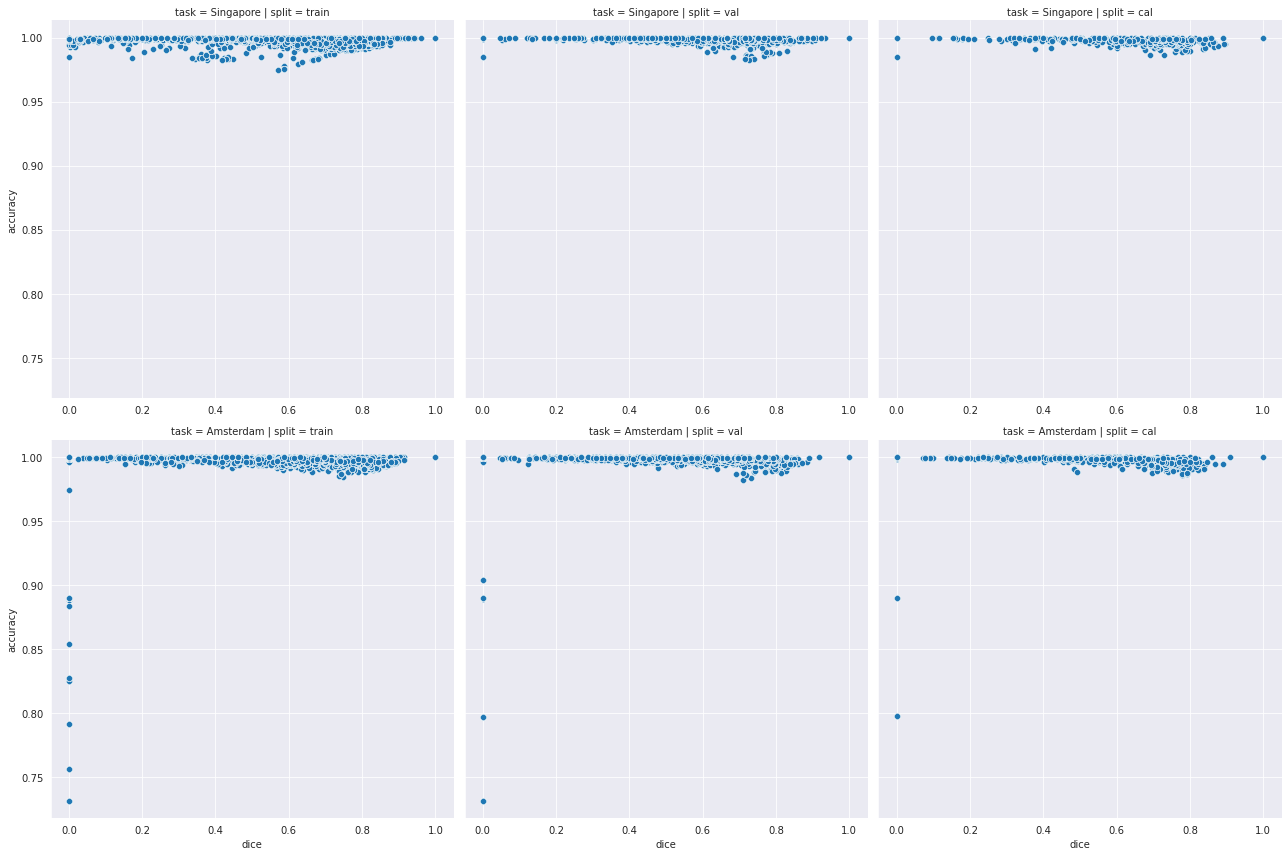

In [6]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='dice',
    y='accuracy',
    row='task',
    col='split',
    kind='scatter',
    height=6,
    facet_kws={"sharex": False}
    )

In [7]:
# Isolate the cases which have no-label and cases where there is at least some label.
def has_label(value):
    return (value != 0.0)

def weighted_metric(metric, weighting):
    return f"{metric}_{weighting}"

# Add some new useful columns
all_logs['has_label'] = all_logs['label_amount'].apply(has_label) 
all_logs['weighted_metric'] = all_logs.apply(lambda row: weighted_metric(row['metric'], row['metric_weighting']), axis=1)

# Drop some columns we won't use like metric_bins, and bin_counts
all_logs = all_logs.drop(columns=['metric_bins', 'bin_counts'])

def reorder_splits(df):
    train_logs = df[df['split'] == 'train']
    val_logs = df[df['split'] == 'val']
    cal_logs = df[df['split'] == 'cal']
    fixed_df = pd.concat([train_logs, val_logs, cal_logs])
    return fixed_df

# Set the rows so that it's train, val, cal
all_logs = reorder_splits(all_logs)

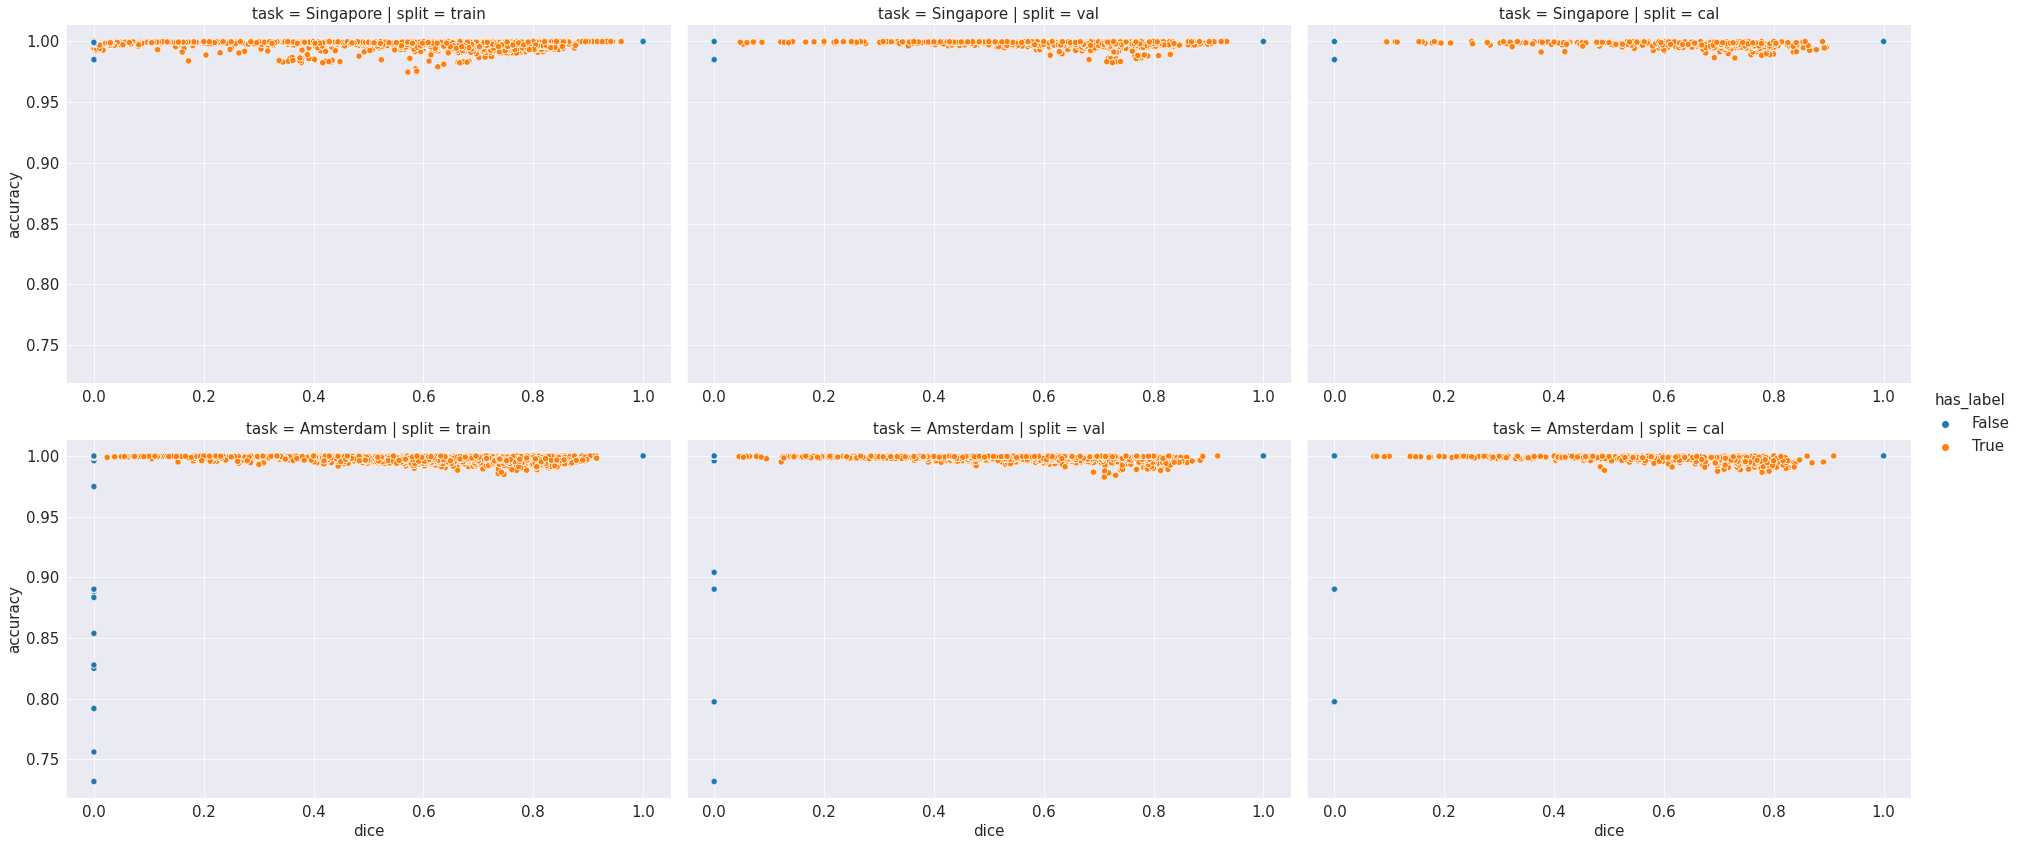

In [8]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='dice',
    y='accuracy',
    row='task',
    col='split',
    kind='scatter',
    hue='has_label',
    height=6,
    facet_kws={"sharex": False},
    aspect=1.5
    )

In [9]:
# Some settings for the plots
logs = all_logs[all_logs['has_label'] == True]
logs = logs[logs['metric_weighting'] == 'weighted']
logs = logs[logs['metric'] != 'ESE']

# Now we want to collapse the data by subject, so we can get the mean metric score for each subject.
logs_per_subject = logs.groupby(['subj_idx', 'metric', 'metric_weighting', 'weighted_metric', 'task', 'split']).agg({
    'label_amount': 'mean',
    'metric_score': 'mean',
    'accuracy': 'mean',
    'dice': 'mean',
    'weighted_accuracy': 'mean'
}).reset_index()

logs_per_subject = reorder_splits(logs_per_subject)

In [10]:
logs_per_subject

,subj_idx,metric,metric_weighting,weighted_metric,task,split,label_amount,metric_score,accuracy,dice,weighted_accuracy
1,0,ECE,weighted,ECE_weighted,Amsterdam,train,29.161765,0.358964,0.999470,0.328900,0.672310
4,0,ECE,weighted,ECE_weighted,Singapore,train,993.962963,0.143637,0.991755,0.531542,0.706788
7,0,ReCE,weighted,ReCE_weighted,Amsterdam,train,29.161765,0.194859,0.999470,0.328900,0.672310
10,0,ReCE,weighted,ReCE_weighted,Singapore,train,993.962963,0.283528,0.991755,0.531542,0.706788
13,1,ECE,weighted,ECE_weighted,Amsterdam,train,45.506494,0.239460,0.999322,0.386838,0.708090
...,...,...,...,...,...,...,...,...,...,...,...
57,4,ReCE,weighted,ReCE_weighted,Singapore,cal,173.304348,0.130648,0.998458,0.595654,0.776011
60,5,ECE,weighted,ECE_weighted,Amsterdam,cal,783.000000,0.127517,0.995095,0.647643,0.794852
65,5,ReCE,weighted,ReCE_weighted,Amsterdam,cal,783.000000,0.127174,0.995095,0.647643,0.794852
70,6,ECE,weighted,ECE_weighted,Amsterdam,cal,52.661538,0.312698,0.999178,0.406490,0.711250


# Now for the graph we really care about, let's look at how each metric/weighting correlates first with dice.

In [11]:
# Define the color palette
metric_weight_palette = {
    'ECE_weighted': 'gold',  # green
    'ReCE_weighted': 'darkgreen'
}

# Group the metrics by important factors
grouped_logs = logs.groupby(['task', 'split', 'weighted_metric'])
grouped_logs_per_subject = logs_per_subject.groupby(['task', 'split', 'weighted_metric'])

In [12]:
# plt.rcParams.update({'font.size': 15})  

# for metric in metric_weight_palette.keys():
#     g = sns.relplot(
#         data=logs[logs['weighted_metric'] == metric],
#         x='accuracy',
#         y='metric_score',
#         col='split',
#         hue='task',
#         kind='scatter',
#         height=8,
#         facet_kws={"sharex": False},
#         alpha=0.5,
#         aspect=1
#         )
#     g.axes.flat[0].set_ylabel(metric)
#     plt.show()

In [13]:
# # Group by the three columns and apply correlation
# plt.rcParams.update({'font.size': 15})  
# accuracy_correlations = grouped_logs.apply(lambda x: x['accuracy'].corr(x['metric_score'])).reset_index(name='accuracy correlation')
# sns.catplot(data=accuracy_correlations, 
#             x="weighted_metric", 
#             y="accuracy correlation", 
#             hue='task', 
#             col="split", 
#             kind="bar", 
#             height=10, 
#             aspect=1.5)

In [14]:
# plt.rcParams.update({'font.size': 15})  

# for metric in metric_weight_palette.keys():
#     g = sns.relplot(
#         data=logs_per_subject[logs_per_subject['weighted_metric'] == metric],
#         x='accuracy',
#         y='metric_score',
#         col='split',
#         hue='task',
#         kind='scatter',
#         s=100,
#         height=8,
#         facet_kws={"sharex": False},
#         alpha=0.8,
#         aspect=1
#         )
#     g.axes.flat[0].set_ylabel(metric)
#     plt.show()

In [15]:
# # Group by the three columns and apply correlation
# accuracy_subject_correlations = grouped_logs_per_subject.apply(lambda x: x['accuracy'].corr(x['metric_score'])).reset_index(name='accuracy correlation')
# accuracy_subject_correlations = reorder_splits(accuracy_subject_correlations)  
# sns.catplot(data=accuracy_subject_correlations, x="weighted_metric", y="accuracy correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

# Now how well does it correspond with dice score?

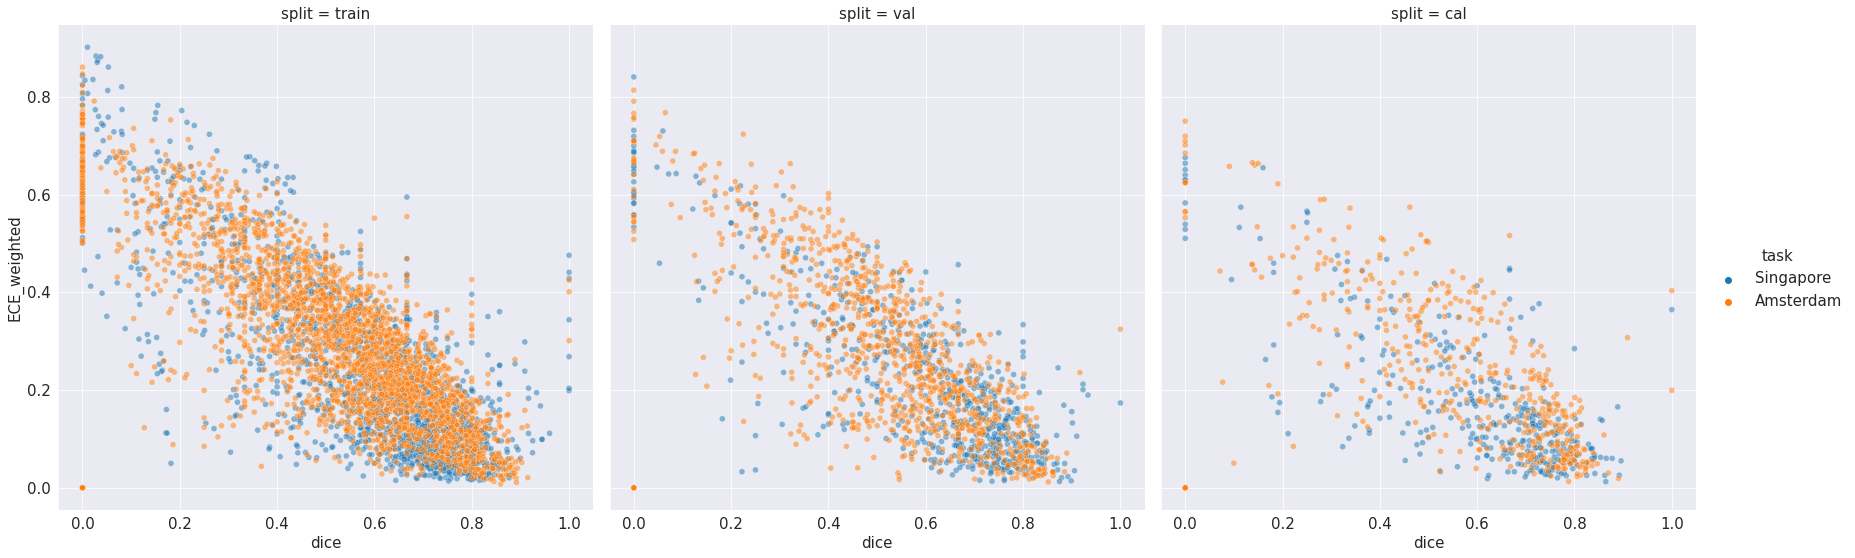

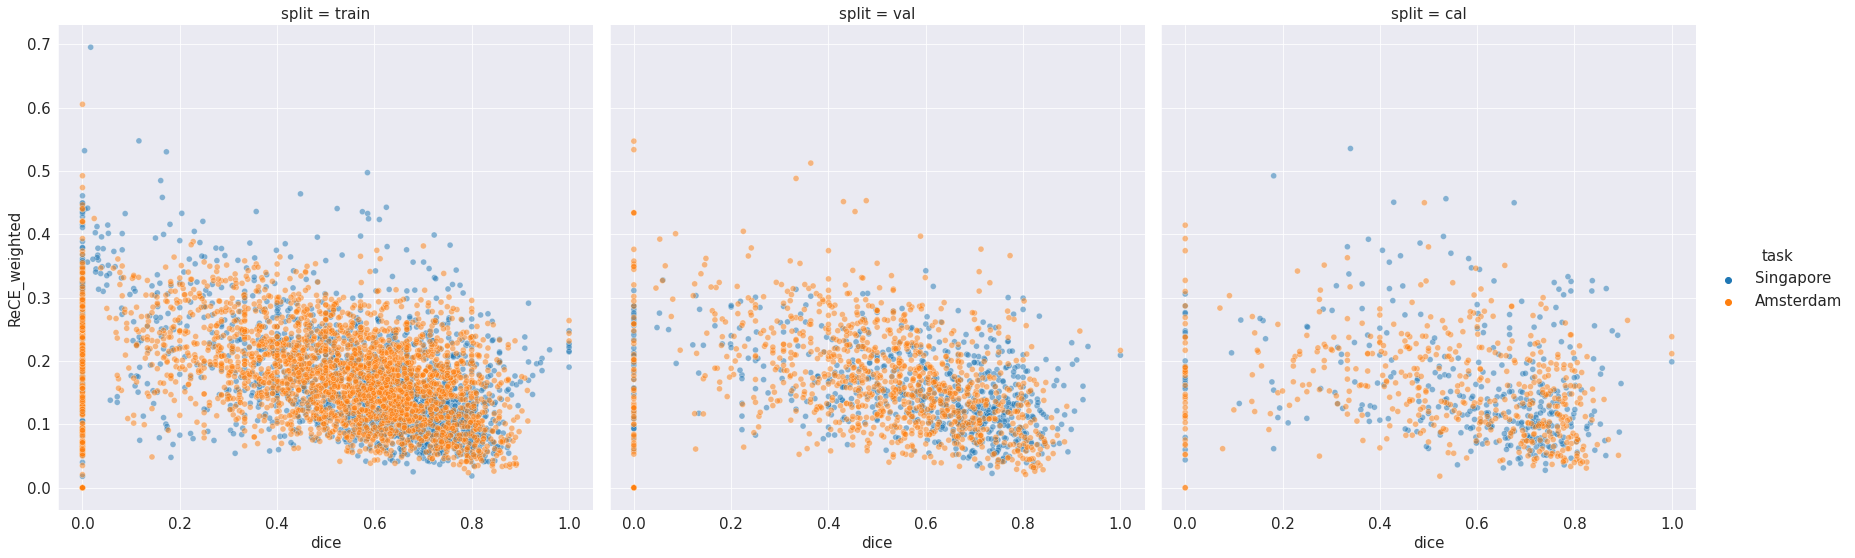

In [16]:
plt.rcParams.update({'font.size': 15})  

for metric in metric_weight_palette.keys():
    g = sns.relplot(
        data=logs[logs['weighted_metric'] == metric],
        x='dice',
        y='metric_score',
        col='split',
        hue='task',
        kind='scatter',
        height=8,
        facet_kws={"sharex": False},
        alpha=0.5,
        aspect=1
        )
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

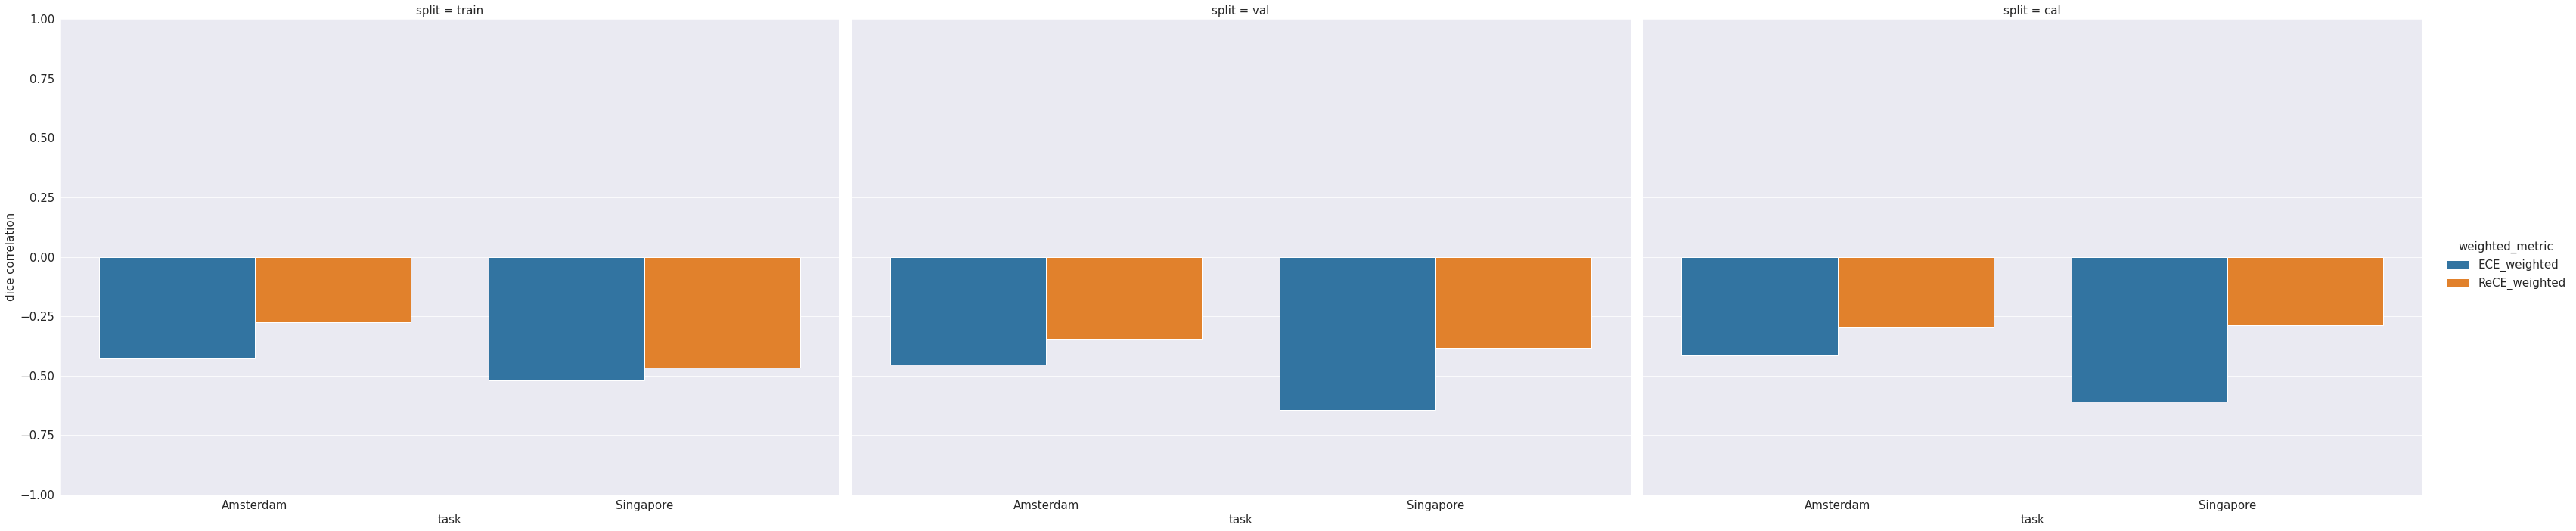

In [17]:
# Group by the three columns and apply correlation
dice_correlations = grouped_logs.apply(lambda x: x['dice'].corr(x['metric_score'])).reset_index(name='dice correlation')
dice_correlations = reorder_splits(dice_correlations)
g = sns.catplot(data=dice_correlations, 
            x="task", 
            y="dice correlation", 
            hue='weighted_metric', 
            col="split", 
            kind="bar", 
            height=10, 
            aspect=1.5)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))

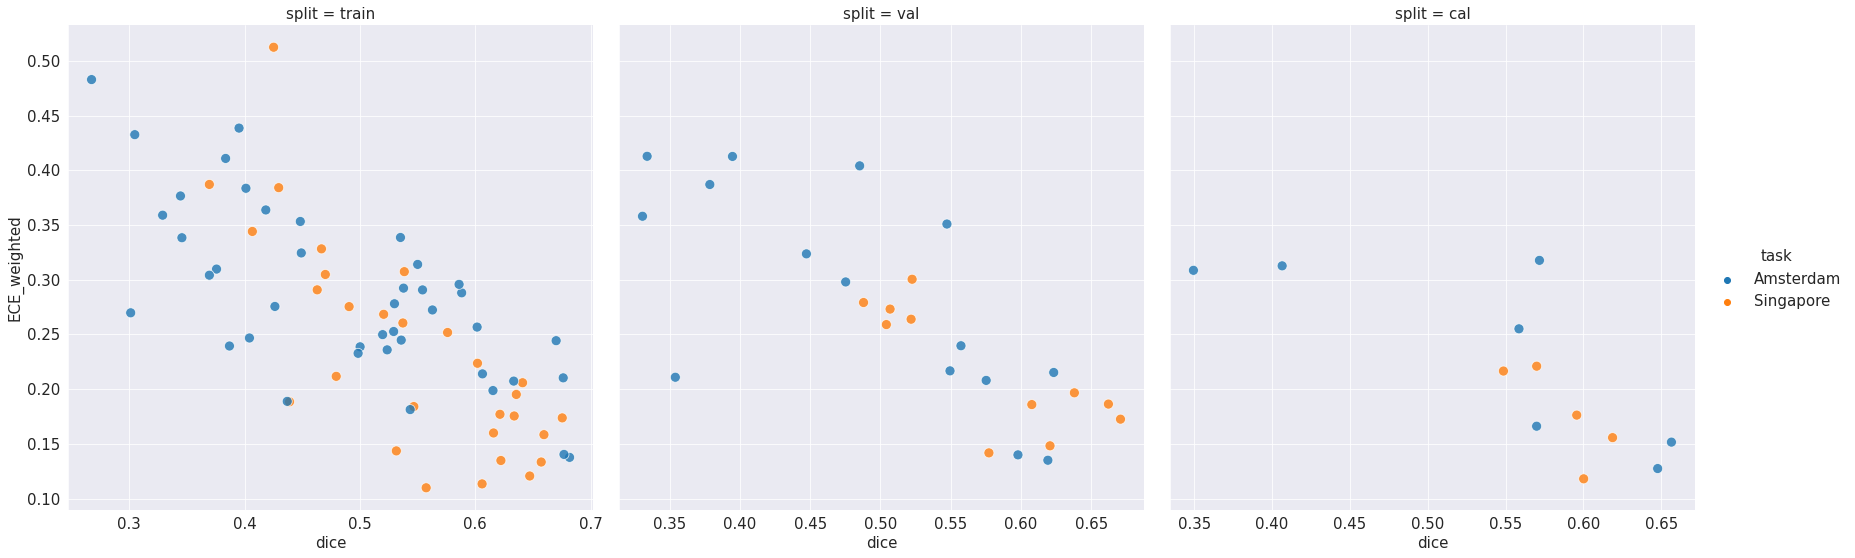

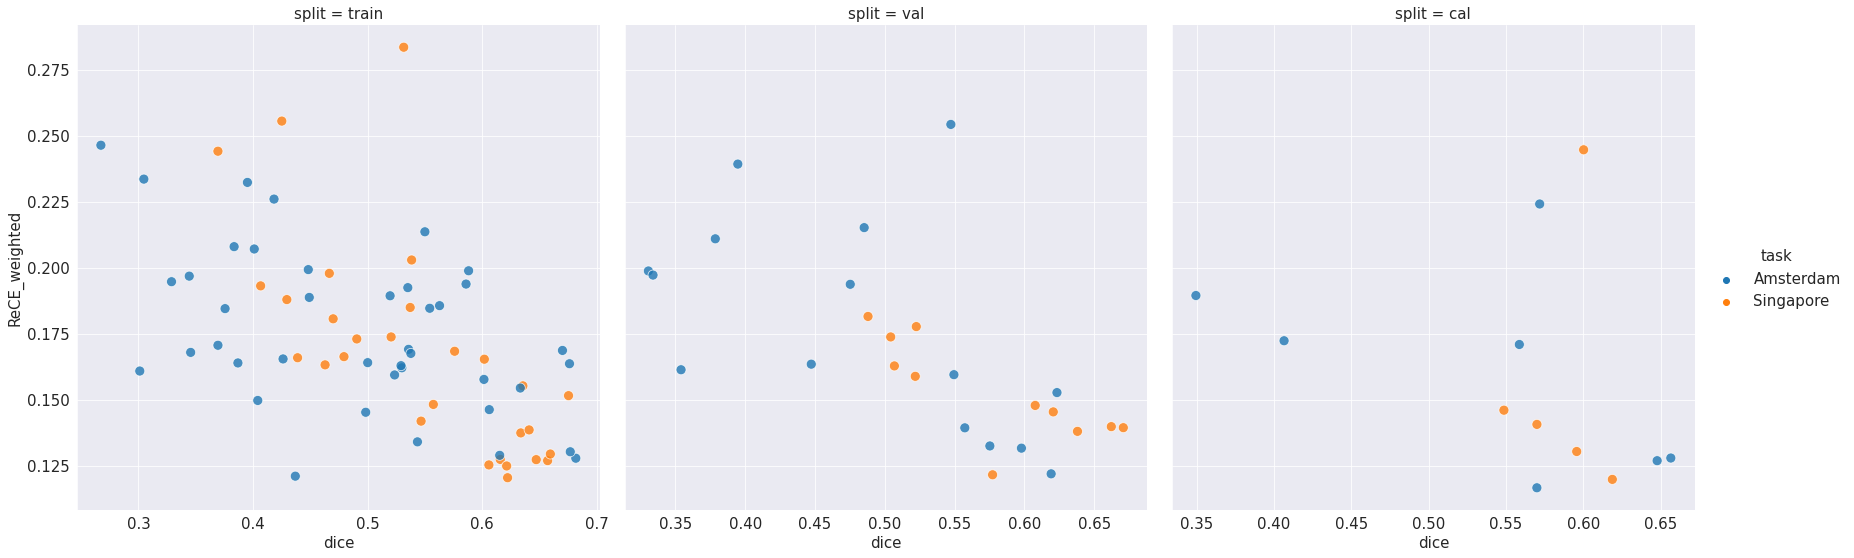

In [18]:
plt.rcParams.update({'font.size': 15})  

for metric in metric_weight_palette.keys():
    g = sns.relplot(
        data=logs_per_subject[logs_per_subject['weighted_metric'] == metric],
        x='dice',
        y='metric_score',
        col='split',
        hue='task',
        kind='scatter',
        s=100,
        height=8,
        facet_kws={"sharex": False},
        alpha=0.8,
        aspect=1
        )
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

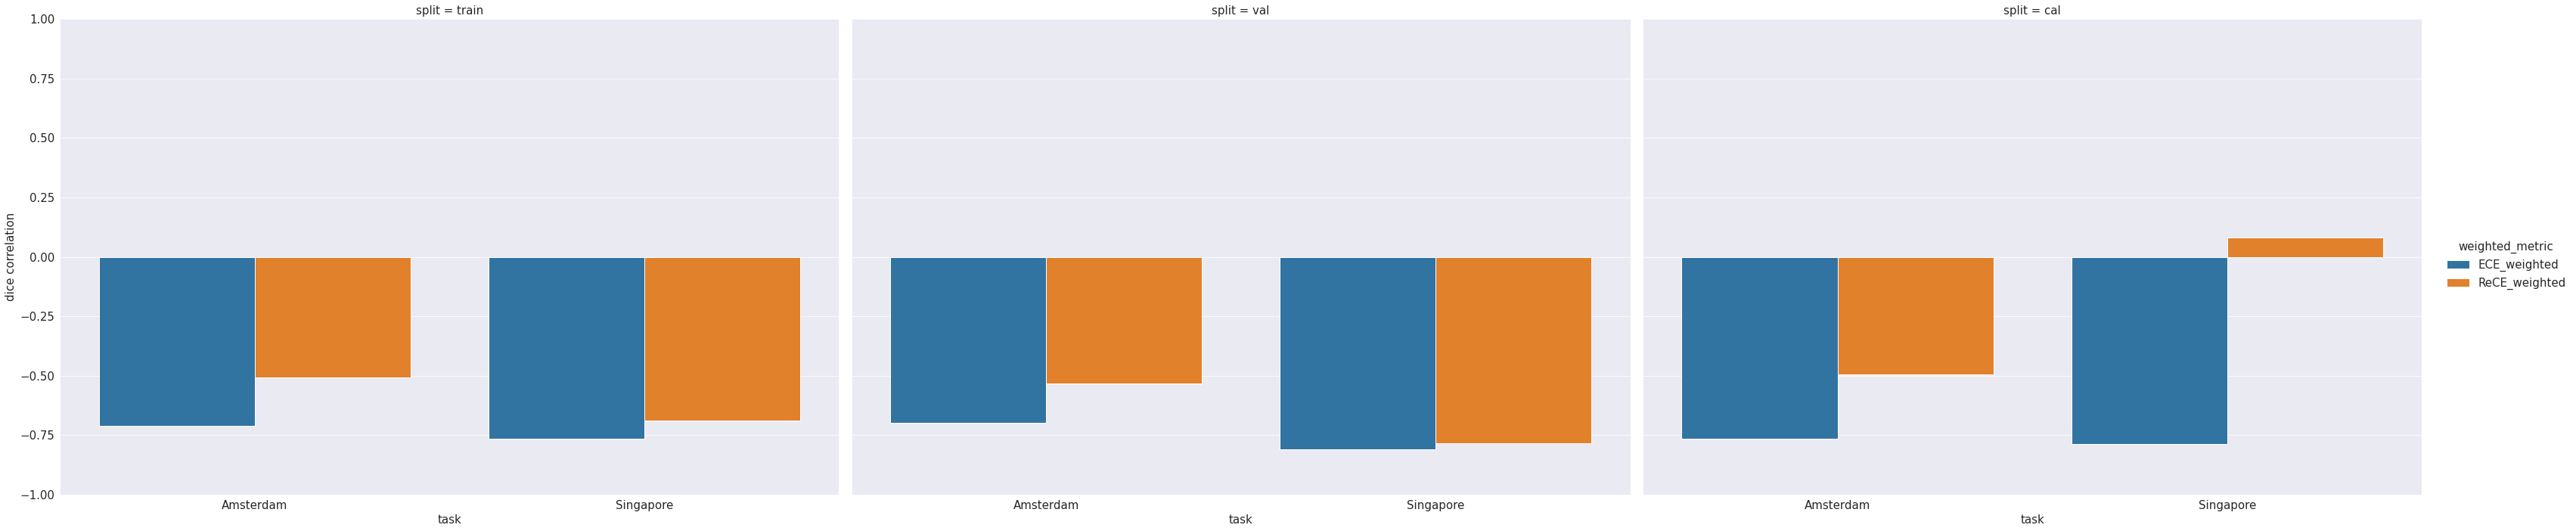

In [19]:
# Group by the three columns and apply correlation
dice_subject_correlations = grouped_logs_per_subject.apply(lambda x: x['dice'].corr(x['metric_score'])).reset_index(name='dice correlation')
dice_subject_correlations = reorder_splits(dice_subject_correlations)
g = sns.catplot(data=dice_subject_correlations, 
                x="task", 
                y="dice correlation", 
                hue='weighted_metric', 
                col="split", 
                kind="bar", 
                height=10, 
                aspect=1.5)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))

# Or how they correlate with the amount of label in the groundtruth segmentation.

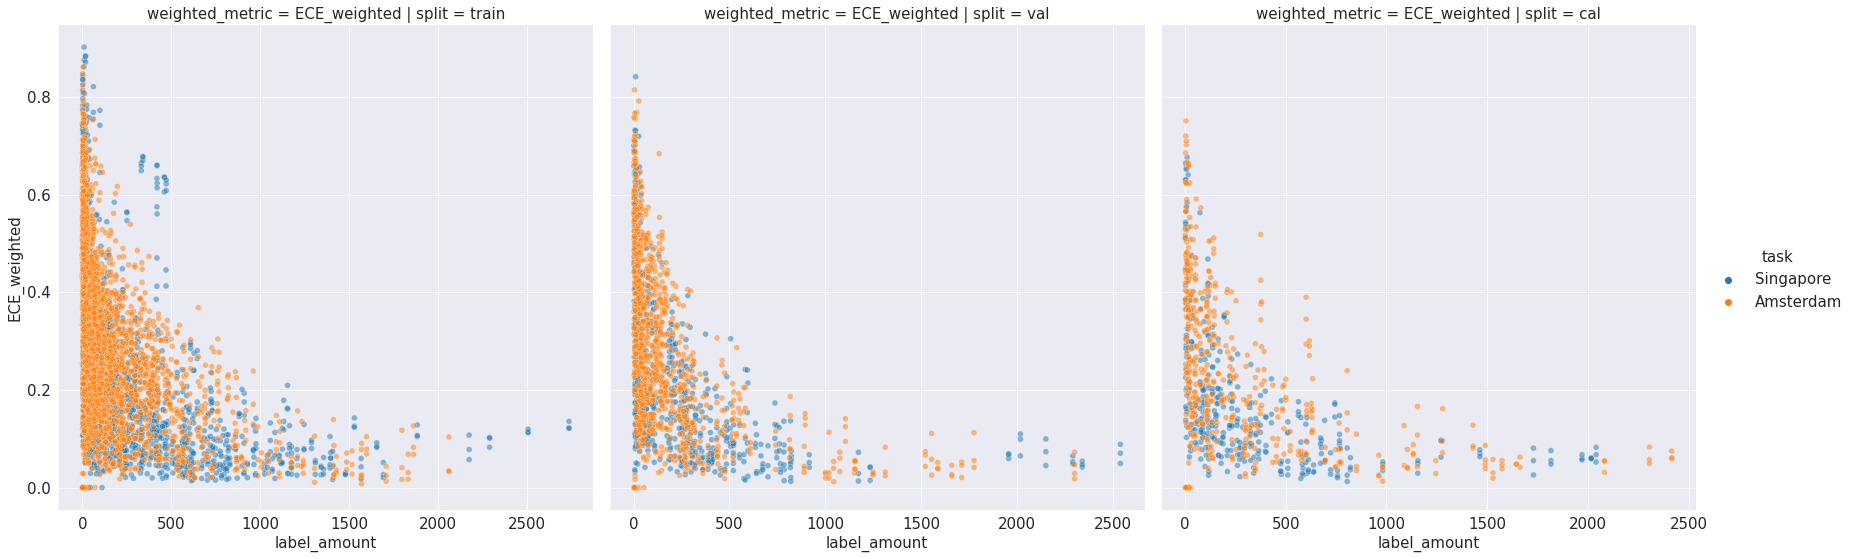

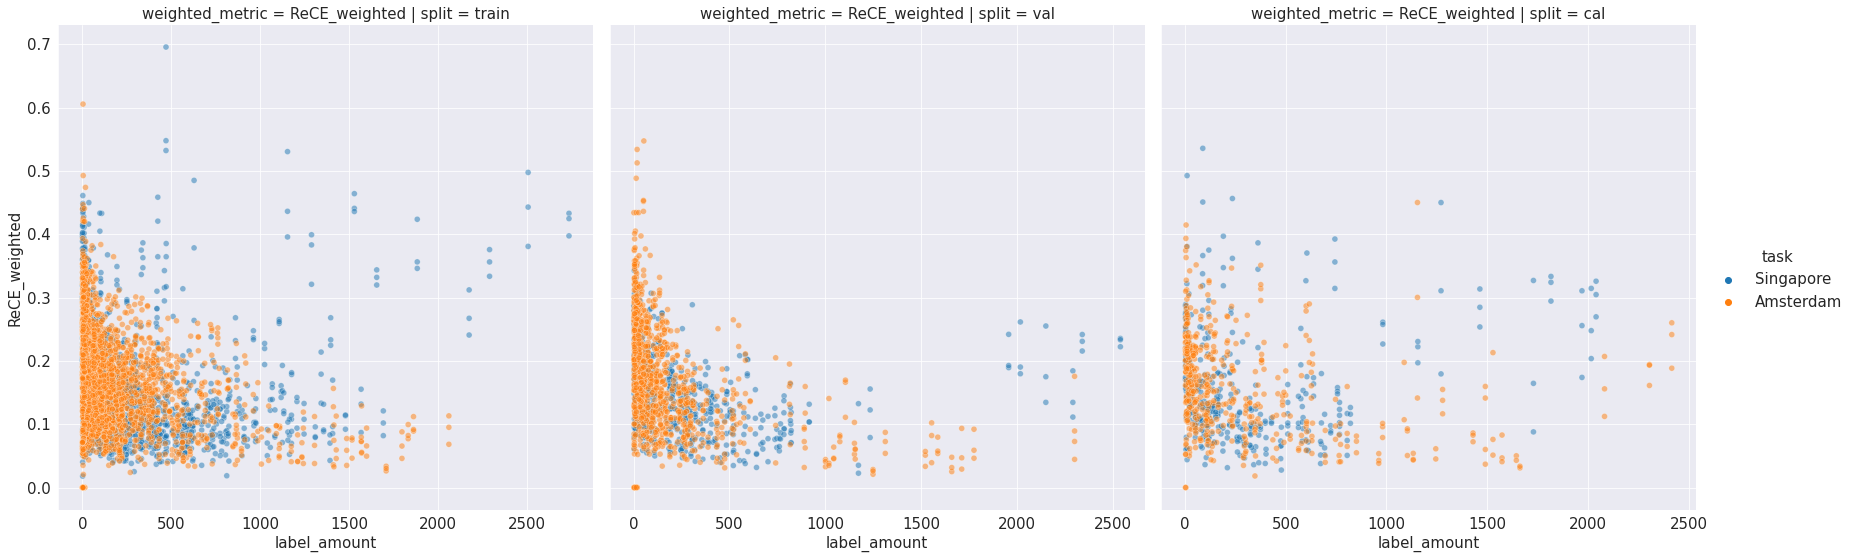

In [20]:
from scipy.stats import pearsonr
plt.rcParams.update({'font.size': 15})  

for metric in metric_weight_palette.keys():
    g = sns.relplot(
        data=logs[logs['weighted_metric'] == metric],
        x='label_amount',
        y='metric_score',
        row='weighted_metric',
        col='split',
        hue='task',
        kind='scatter',
        height=8,
        facet_kws={"sharex": False},
        alpha=0.5,
        aspect=1
    )
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

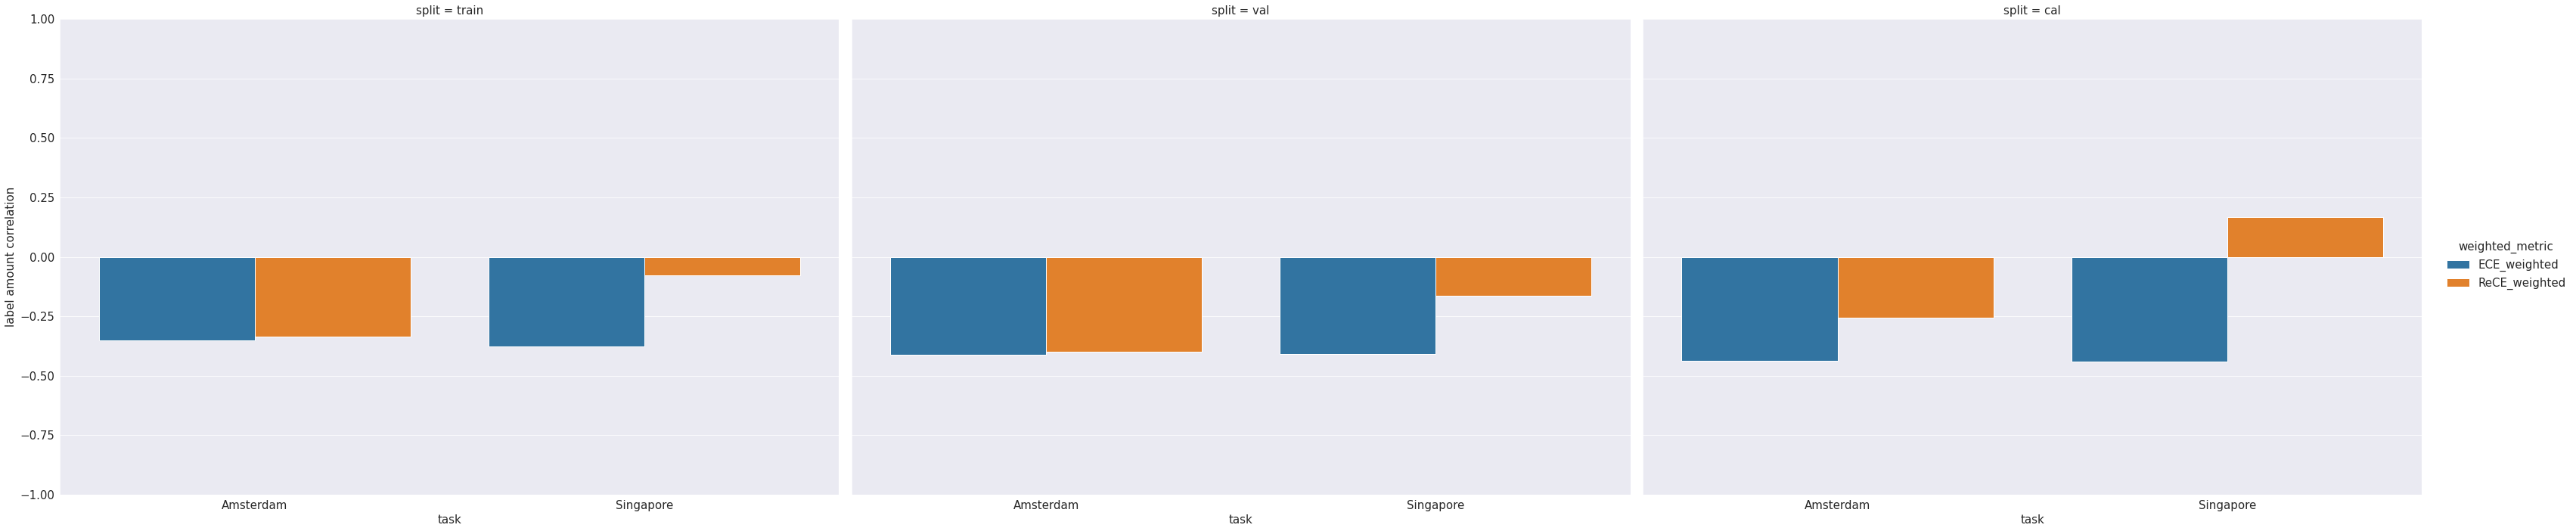

In [21]:
# Group by the three columns and apply correlation
label_amount_correlations = logs.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['label_amount'].corr(x['metric_score'])).reset_index(name='label amount correlation')
label_amount_correlations = reorder_splits(label_amount_correlations)
g = sns.catplot(data=label_amount_correlations, 
                x="task", 
                y="label amount correlation", 
                hue='weighted_metric', 
                col="split", 
                kind="bar", 
                height=10, 
                aspect=1.5)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))

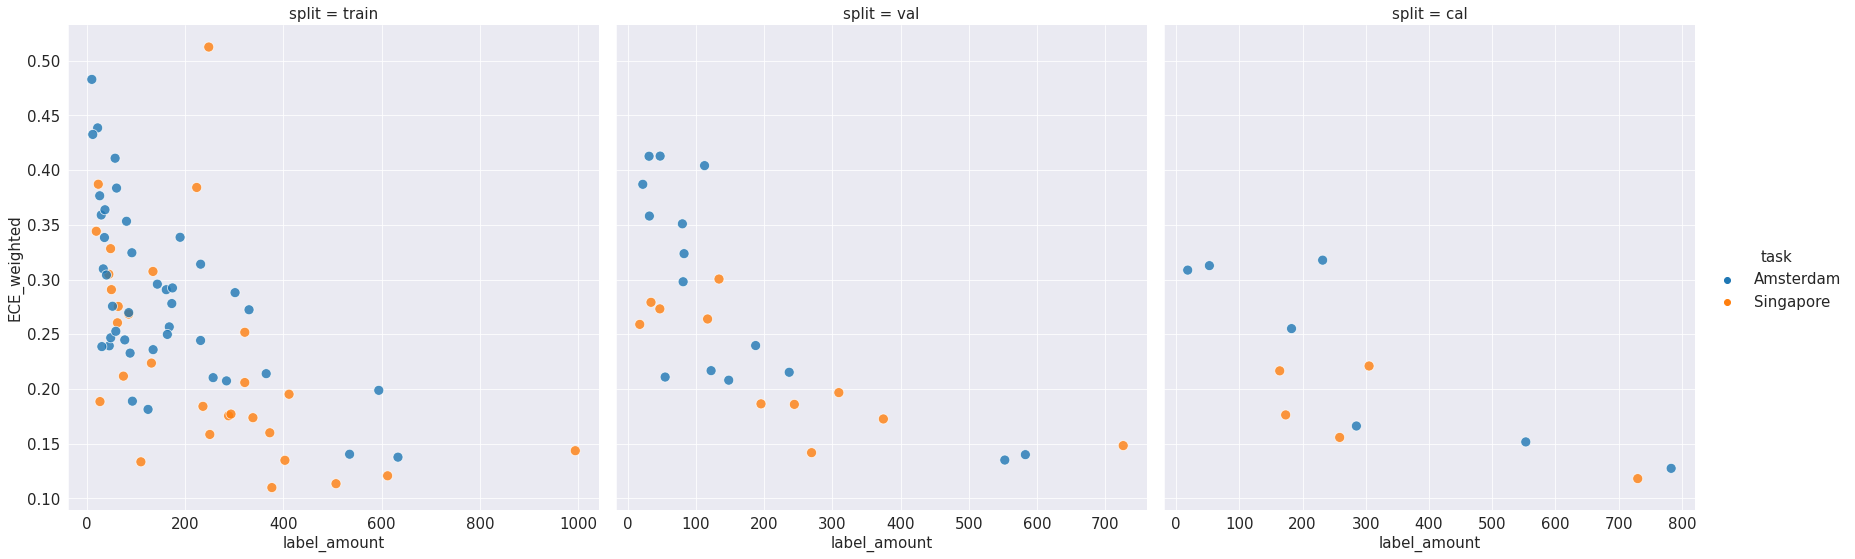

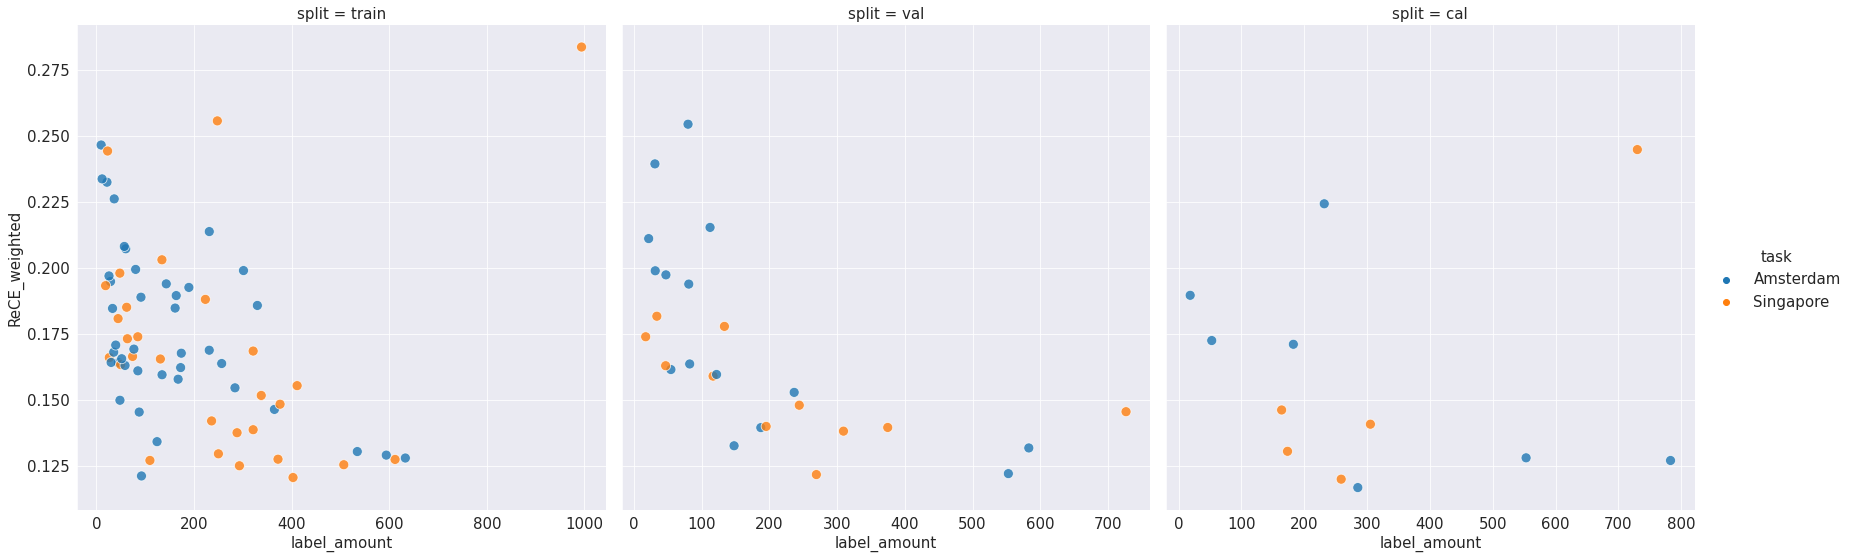

In [22]:
plt.rcParams.update({'font.size': 15})  

for metric in metric_weight_palette.keys():
    g = sns.relplot(
        data=logs_per_subject[logs_per_subject['weighted_metric'] == metric],
        x='label_amount',
        y='metric_score',
        col='split',
        hue='task',
        kind='scatter',
        s=100,
        height=8,
        facet_kws={"sharex": False},
        alpha=0.8,
        aspect=1
        )
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

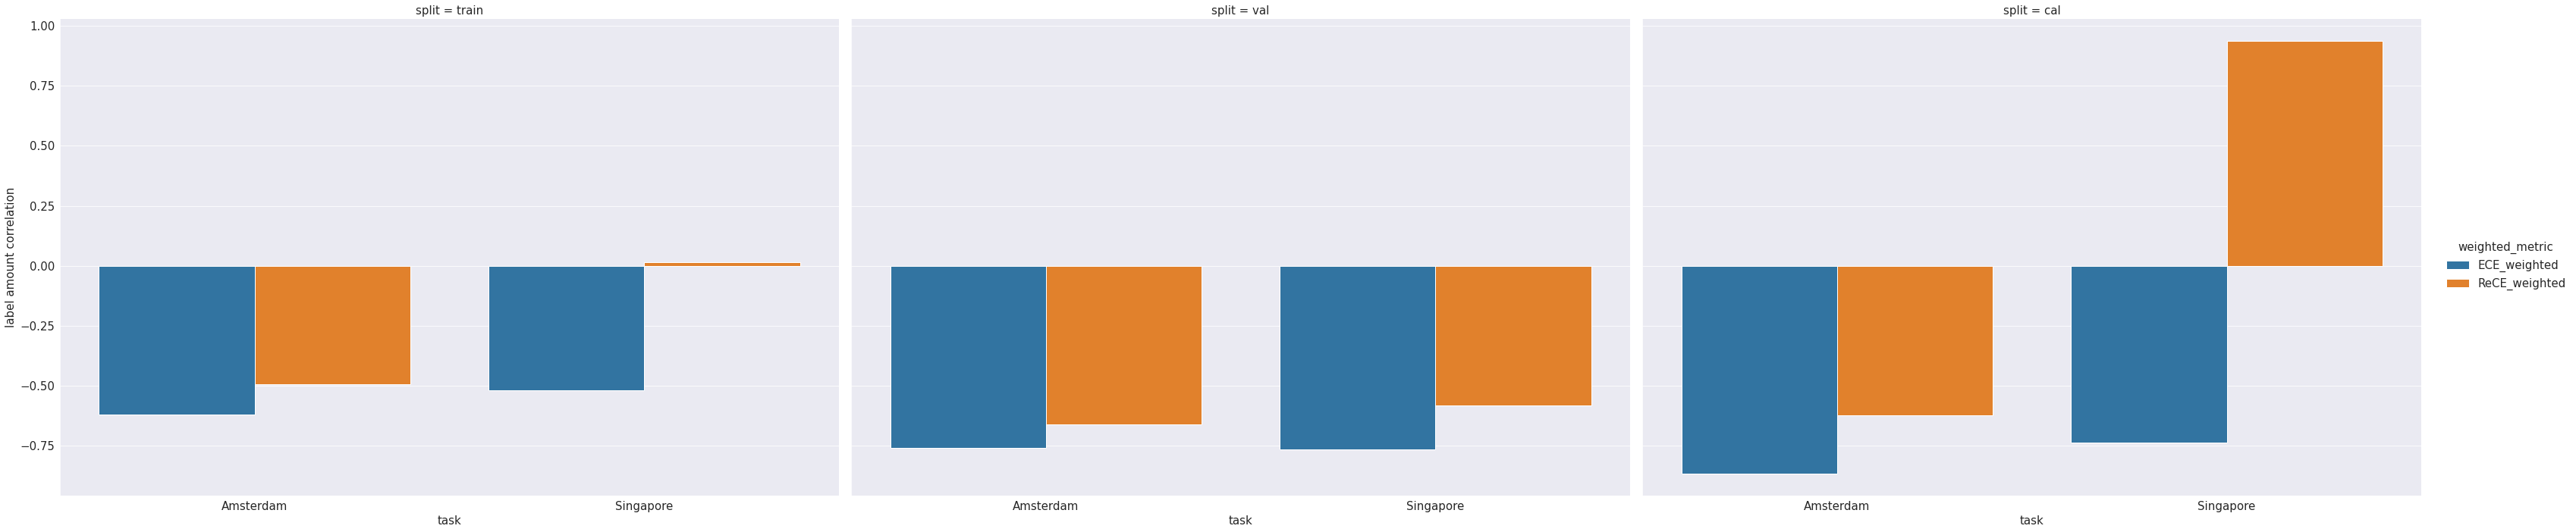

In [23]:
# Group by the three columns and apply correlation
label_amount_subject_correlations = grouped_logs_per_subject.apply(lambda x: x['label_amount'].corr(x['metric_score'])).reset_index(name='label amount correlation')
label_amount_subject_correlations = reorder_splits(label_amount_subject_correlations)
sns.catplot(data=label_amount_subject_correlations, 
            x="task", 
            y="label amount correlation", 
            hue='weighted_metric', 
            col="split", 
            kind="bar", 
            height=10, 
            aspect=1.5)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))

# Finally we can look at weighted accuracy as well.

In [24]:
# plt.rcParams.update({'font.size': 15})  

# for metric in metric_weight_palette.keys():
#     g = sns.relplot(
#         data=logs[logs['weighted_metric'] == metric],
#         x='weighted_accuracy',
#         y='metric_score',
#         col='split',
#         hue='task',
#         kind='scatter',
#         height=8,
#         facet_kws={"sharex": False},
#         alpha=0.5,
#         aspect=1
#     )
#     g.axes.flat[0].set_ylabel(metric)
#     plt.show()

In [25]:
# # Group by the three columns and apply correlation
# weighted_accuracy_correlations = logs.groupby(['task', 'split', 'weighted_metric']).apply(lambda x: x['weighted_accuracy'].corr(x['metric_score'])).reset_index(name='weighted accuracy correlation')
# weighted_accuracy_correlations = reorder_splits(weighted_accuracy_correlations)
# sns.catplot(data=weighted_accuracy_correlations, x="weighted_metric", y="weighted accuracy correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)

In [26]:
# plt.rcParams.update({'font.size': 15})  

# for metric in metric_weight_palette.keys():
#     g = sns.relplot(
#         data=logs_per_subject[logs_per_subject['weighted_metric'] == metric],
#         x='weighted_accuracy',
#         y='metric_score',
#         col='split',
#         hue='task',
#         kind='scatter',
#         s=100,
#         height=8,
#         facet_kws={"sharex": False},
#         alpha=0.8,
#         aspect=1
#         )
#     g.axes.flat[0].set_ylabel(metric)
#     plt.show()

In [27]:
# # Group by the three columns and apply correlation
# weighted_accuracy_subject_correlations = grouped_logs_per_subject.apply(lambda x: x['weighted_accuracy'].corr(x['metric_score'])).reset_index(name='weighted accuracy correlation')
# weighted_accuracy_subject_correlations = reorder_splits(weighted_accuracy_subject_correlations)
# g = sns.catplot(data=weighted_accuracy_subject_correlations, x="weighted_metric", y="weighted accuracy correlation", hue='task', col="split", kind="bar", height=10, aspect=1.5)
# # Set the y lim between - 1 and 1
# g.set(ylim=(-1, 1))